In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from verstack import NaNImputer
from catboost import CatBoostClassifier
import seaborn as sns
from keras.callbacks import EarlyStopping

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import skew

In [32]:
df = pd.read_csv('loan_level_500k.csv')
df.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,...,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
0,669.0,200206,N,202901,NaN,0.0,1.0,O,80.0,33.0,...,SF,26100.0,F199Q1000004,P,320,2.0,Other sellers,Other servicers,True,False
1,732.0,199904,N,202903,17140.0,0.0,1.0,O,25.0,10.0,...,SF,45200.0,F199Q1000005,N,360,1.0,Other sellers,Other servicers,True,False
2,679.0,200208,N,202902,15940.0,30.0,1.0,O,91.0,48.0,...,SF,44700.0,F199Q1000007,P,319,1.0,Other sellers,Other servicers,True,False
3,721.0,200209,N,202902,38060.0,0.0,1.0,O,39.0,13.0,...,SF,85200.0,F199Q1000013,N,318,2.0,Other sellers,Other servicers,True,False
4,618.0,200210,N,202902,10420.0,25.0,1.0,O,85.0,24.0,...,SF,44200.0,F199Q1000015,N,317,2.0,Other sellers,Other servicers,True,False


In [33]:
df.drop('LOAN_SEQUENCE_NUMBER', inplace=True, axis =1)

In [34]:
df.shape

(500137, 26)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500137 entries, 0 to 500136
Data columns (total 26 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CREDIT_SCORE                      497426 non-null  float64
 1   FIRST_PAYMENT_DATE                500137 non-null  int64  
 2   FIRST_TIME_HOMEBUYER_FLAG         369578 non-null  object 
 3   MATURITY_DATE                     500137 non-null  int64  
 4   METROPOLITAN_STATISTICAL_AREA     429988 non-null  float64
 5   MORTGAGE_INSURANCE_PERCENTAGE     449089 non-null  float64
 6   NUMBER_OF_UNITS                   500134 non-null  float64
 7   OCCUPANCY_STATUS                  500137 non-null  object 
 8   ORIGINAL_COMBINED_LOAN_TO_VALUE   500124 non-null  float64
 9   ORIGINAL_DEBT_TO_INCOME_RATIO     485208 non-null  float64
 10  ORIGINAL_UPB                      500137 non-null  int64  
 11  ORIGINAL_LOAN_TO_VALUE            500128 non-null  f

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CREDIT_SCORE,497426.0,712.536212,54.791262,300.000,676.000,719.0,756.000,839.0
FIRST_PAYMENT_DATE,500137.0,200025.430952,109.815541,199901.000,199904.000,200005.0,200105.000,201103.0
MATURITY_DATE,500137.0,203023.195872,110.384189,202402.000,202903.000,203004.0,203104.000,204101.0
METROPOLITAN_STATISTICAL_AREA,429988.0,30777.824739,11333.401144,10180.000,19740.000,33340.0,40420.000,49740.0
MORTGAGE_INSURANCE_PERCENTAGE,449089.0,7.744532,12.046546,0.000,0.000,0.0,18.000,55.0
NUMBER_OF_UNITS,500134.0,1.028890,0.218391,1.000,1.000,1.0,1.000,4.0
ORIGINAL_COMBINED_LOAN_TO_VALUE,500124.0,76.053571,15.139986,6.000,70.000,80.0,88.000,180.0
ORIGINAL_DEBT_TO_INCOME_RATIO,485208.0,32.917541,11.111800,1.000,25.000,33.0,41.000,65.0
ORIGINAL_UPB,500137.0,136493.484785,60968.743066,8000.000,89000.000,126000.0,176000.000,578000.0
ORIGINAL_LOAN_TO_VALUE,500128.0,75.710714,14.937717,6.000,70.000,80.0,85.000,100.0


Dropping irrelevant columns (Not Available during prediction)

In [37]:
df.drop(["FIRST_PAYMENT_DATE", "MATURITY_DATE", "MORTGAGE_INSURANCE_PERCENTAGE", "ORIGINAL_UPB", "ORIGINAL_INTEREST_RATE", "PREPAYMENT_PENALTY_MORTGAGE_FLAG"], inplace=True, axis=1)

In [38]:
print(df.isnull().sum().sort_values())

PRODUCT_TYPE                            0
SERVICER_NAME                           0
SELLER_NAME                             0
ORIGINAL_LOAN_TERM                      0
LOAN_PURPOSE                            0
PROPERTY_STATE                          0
PREPAID                                 0
CHANNEL                                 0
DELINQUENT                              0
OCCUPANCY_STATUS                        0
NUMBER_OF_UNITS                         3
ORIGINAL_LOAN_TO_VALUE                  9
ORIGINAL_COMBINED_LOAN_TO_VALUE        13
POSTAL_CODE                            31
PROPERTY_TYPE                          95
NUMBER_OF_BORROWERS                   247
CREDIT_SCORE                         2711
ORIGINAL_DEBT_TO_INCOME_RATIO       14929
METROPOLITAN_STATISTICAL_AREA       70149
FIRST_TIME_HOMEBUYER_FLAG          130559
dtype: int64


In [39]:
def missing_percentage(df):
    missing = pd.DataFrame(columns=['Category', 'Percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missing = missing.append({'Category':col, 'Percentage':percentage}, ignore_index = True)
    return missing

In [40]:
missingdata = missing_percentage(df)
missingdata.sort_values('Percentage', ascending=False)

,Category,Percentage
1,FIRST_TIME_HOMEBUYER_FLAG,26.104647
2,METROPOLITAN_STATISTICAL_AREA,14.025957
5,ORIGINAL_DEBT_TO_INCOME_RATIO,2.984982
0,CREDIT_SCORE,0.542051
9,NUMBER_OF_BORROWERS,0.049386
7,PROPERTY_TYPE,0.018995
8,POSTAL_CODE,0.006198
4,ORIGINAL_COMBINED_LOAN_TO_VALUE,0.002599
6,ORIGINAL_LOAN_TO_VALUE,0.0018
3,NUMBER_OF_UNITS,0.0006


In [41]:
df.FIRST_TIME_HOMEBUYER_FLAG.value_counts()

N    320418
Y     49160
Name: FIRST_TIME_HOMEBUYER_FLAG, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['DELINQUENT']= label_encoder.fit_transform(df['DELINQUENT'])
df['PREPAID']= label_encoder.fit_transform(df['PREPAID'])
df['POSTAL_CODE'] = label_encoder.fit_transform(df['POSTAL_CODE'])
df['FIRST_TIME_HOMEBUYER_FLAG'] = label_encoder.fit_transform(df['FIRST_TIME_HOMEBUYER_FLAG'])

In [43]:
mylist = ['OCCUPANCY_STATUS', 'CHANNEL', 'PRODUCT_TYPE', 'PROPERTY_STATE',
          'PROPERTY_TYPE', 'LOAN_PURPOSE', 'SELLER_NAME', 'SERVICER_NAME']

In [44]:
col = df.columns
col

Index(['CREDIT_SCORE', 'FIRST_TIME_HOMEBUYER_FLAG',
       'METROPOLITAN_STATISTICAL_AREA', 'NUMBER_OF_UNITS', 'OCCUPANCY_STATUS',
       'ORIGINAL_COMBINED_LOAN_TO_VALUE', 'ORIGINAL_DEBT_TO_INCOME_RATIO',
       'ORIGINAL_LOAN_TO_VALUE', 'CHANNEL', 'PRODUCT_TYPE', 'PROPERTY_STATE',
       'PROPERTY_TYPE', 'POSTAL_CODE', 'LOAN_PURPOSE', 'ORIGINAL_LOAN_TERM',
       'NUMBER_OF_BORROWERS', 'SELLER_NAME', 'SERVICER_NAME', 'PREPAID',
       'DELINQUENT'],
      dtype='object')

In [45]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
df_fit = enc.fit_transform(df[mylist])

In [46]:
df_fit = pd.DataFrame(df_fit, columns=mylist)

In [47]:
df_out = df_fit.join(df.drop(columns=mylist, axis=1))

In [48]:
from verstack import NaNImputer
imputer = NaNImputer()
df_imp = imputer.impute(df_out)

NaNImputer(conservative = False, n_feats = 10,            
           fix_string_nans = True, verbose = True,                
           multiprocessing_load = 3, fill_nans_in_pure_text = True,                    
           drop_empty_cols = True, drop_nan_cols_with_constant = True                        
           feature_selection = correlation)

Dataset dimensions:
 - rows:         500137
 - columns:      20
 - mb in memory: 74.41
 - NaN cols num: 8
--------------------------

Deploy multiprocessing with 12 parallel proceses


NaNs imputation time: 0.75 minutes
--------------------------------------------------


In [49]:
print(df_imp.isnull().sum().sort_values())

OCCUPANCY_STATUS                       0
ORIGINAL_LOAN_TERM                     0
POSTAL_CODE                            0
ORIGINAL_LOAN_TO_VALUE                 0
PREPAID                                0
SERVICER_NAME                          0
FIRST_TIME_HOMEBUYER_FLAG              0
LOAN_PURPOSE                           0
PROPERTY_TYPE                          0
PROPERTY_STATE                         0
PRODUCT_TYPE                           0
CHANNEL                                0
SELLER_NAME                            0
DELINQUENT                             0
NUMBER_OF_UNITS                        3
ORIGINAL_COMBINED_LOAN_TO_VALUE       13
NUMBER_OF_BORROWERS                  247
CREDIT_SCORE                        2711
ORIGINAL_DEBT_TO_INCOME_RATIO      14929
METROPOLITAN_STATISTICAL_AREA      70149
dtype: int64


In [50]:
df_imp.dropna(inplace=True)
print(df_imp.isnull().sum().sort_values())

OCCUPANCY_STATUS                   0
NUMBER_OF_BORROWERS                0
ORIGINAL_LOAN_TERM                 0
POSTAL_CODE                        0
ORIGINAL_LOAN_TO_VALUE             0
ORIGINAL_DEBT_TO_INCOME_RATIO      0
ORIGINAL_COMBINED_LOAN_TO_VALUE    0
NUMBER_OF_UNITS                    0
METROPOLITAN_STATISTICAL_AREA      0
FIRST_TIME_HOMEBUYER_FLAG          0
CREDIT_SCORE                       0
SERVICER_NAME                      0
SELLER_NAME                        0
LOAN_PURPOSE                       0
PROPERTY_TYPE                      0
PROPERTY_STATE                     0
PRODUCT_TYPE                       0
CHANNEL                            0
PREPAID                            0
DELINQUENT                         0
dtype: int64


Pyod - Outlier Detection

In [51]:
# from numpy import percentile
# import matplotlib.pyplot as plt
# import matplotlib.font_manager
#
# # Import all models
# from pyod.models.abod import ABOD
# from pyod.models.cblof import CBLOF
# from pyod.models.feature_bagging import FeatureBagging
# from pyod.models.hbos import HBOS
# from pyod.models.iforest import IForest
# from pyod.models.knn import KNN
# from pyod.models.lof import LOF
# from pyod.models.mcd import MCD
# from pyod.models.ocsvm import OCSVM
# from pyod.models.pca import PCA
# from pyod.models.lscp import LSCP
# from pyod.models.inne import INNE
# from pyod.models.gmm import GMM
# from pyod.models.kde import KDE
# from pyod.models.lmdd import LMDD

In [52]:
# classifiers = {
#     'Angle-based Outlier Detector (ABOD)':
#         ABOD(),
#     'Cluster-based Local Outlier Factor (CBLOF)':
#         CBLOF(),
#     'Feature Bagging':
#         FeatureBagging(LOF(n_neighbors=35),),
#     'Histogram-base Outlier Detection (HBOS)': HBOS(),
#     'Isolation Forest': IForest(),
#     'K Nearest Neighbors (KNN)': KNN(),
#     'Average KNN': KNN(method='mean'),
#     'Local Outlier Factor (LOF)':
#         LOF(n_neighbors=35),
#     'Minimum Covariance Determinant (MCD)': MCD(),
#     'One-class SVM (OCSVM)': OCSVM(),
#     'Principal Component Analysis (PCA)': PCA(),
#     'Locally Selective Combination (LSCP)': LSCP(),
#     'INNE': INNE(),
#     'GMM': GMM(),
#     'KDE': KDE(),
#     'LMDD': LMDD(),
# }

Seperate Data

In [53]:
X = df_imp.drop('DELINQUENT', axis =1)
y = df_imp['DELINQUENT']

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414532 entries, 1 to 500135
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   OCCUPANCY_STATUS                 414532 non-null  float64
 1   CHANNEL                          414532 non-null  float64
 2   PRODUCT_TYPE                     414532 non-null  float64
 3   PROPERTY_STATE                   414532 non-null  float64
 4   PROPERTY_TYPE                    414532 non-null  float64
 5   LOAN_PURPOSE                     414532 non-null  float64
 6   SELLER_NAME                      414532 non-null  float64
 7   SERVICER_NAME                    414532 non-null  float64
 8   CREDIT_SCORE                     414532 non-null  float64
 9   FIRST_TIME_HOMEBUYER_FLAG        414532 non-null  int32  
 10  METROPOLITAN_STATISTICAL_AREA    414532 non-null  float64
 11  NUMBER_OF_UNITS                  414532 non-null  float64
 12  OR

In [55]:
y.value_counts().to_frame().T

,0,1
DELINQUENT,400633,13899


Feature Selection - PCA

In [56]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 15)
# X = pca.fit_transform(X)

Train test Split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [58]:
y_train.value_counts()

0    240329
1      8390
Name: DELINQUENT, dtype: int64

Scaling

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

Over-sample approach

In [60]:
from imblearn.over_sampling import RandomOverSampler
sam = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = sam.fit_resample(X_scaled, y_train)

ML - Model (Xgboost)

In [61]:
import xgboost as xgb
from xgboost import XGBClassifier
data_dmatrix = xgb.DMatrix(data=X,label=y)

xgb_model = XGBClassifier()

In [62]:
xgb_model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [63]:
y_pred = xgb_model.predict(X_test_s)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95    146591
           1       0.75      0.21      0.33     19222

    accuracy                           0.90    165813
   macro avg       0.83      0.60      0.64    165813
weighted avg       0.89      0.90      0.88    165813



In [65]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
          'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
            num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [66]:
xgb_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.582928,0.001301,0.582949,0.002688
1,0.723365,0.054055,0.720633,0.054154
2,0.780916,0.051400,0.780353,0.052853
3,0.804944,0.070189,0.803866,0.069987
4,0.810767,0.066169,0.809544,0.066661
5,0.883711,0.018218,0.884505,0.018213
6,0.892528,0.009460,0.892513,0.010942
7,0.890572,0.009643,0.890458,0.011255
8,0.892707,0.007882,0.892689,0.009001
9,0.895465,0.006496,0.894627,0.007711


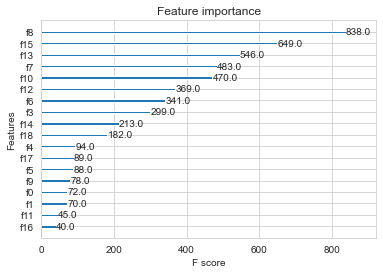

<Figure size 1152x864 with 0 Axes>

In [67]:
xgb.plot_importance(xgb_model)
plt.figure(figsize = (16, 12))
plt.show()

HyperParameters

In [68]:
# param_grid = dict(scale_pos_weight = [1],
#                   objective=['bunary:logistic'],
#                   max_depth = [4,6,8],
#                   alpha=[10],
#                   learning_rate = [0.3,0.01],
#                   n_estimTORS=[100])

In [69]:
# from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

In [70]:
# CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, n_jobs=-1, cv=CV, scoring='f1', error_score='raise')

In [72]:
# grid_result = grid.fit(X_resampled, y_resampled)

ML - Model (Catboost)

In [73]:
catb = CatBoostClassifier()

In [74]:
catb.fit(X_resampled, y_resampled)

Learning rate set to 0.143906
0:	learn: 0.5801710	total: 234ms	remaining: 3m 53s
1:	learn: 0.5123842	total: 300ms	remaining: 2m 29s
2:	learn: 0.4685317	total: 374ms	remaining: 2m 4s
3:	learn: 0.4376430	total: 451ms	remaining: 1m 52s
4:	learn: 0.4183951	total: 530ms	remaining: 1m 45s
5:	learn: 0.4048468	total: 621ms	remaining: 1m 42s
6:	learn: 0.3961560	total: 696ms	remaining: 1m 38s
7:	learn: 0.3889493	total: 765ms	remaining: 1m 34s
8:	learn: 0.3840467	total: 843ms	remaining: 1m 32s
9:	learn: 0.3799035	total: 918ms	remaining: 1m 30s
10:	learn: 0.3768229	total: 999ms	remaining: 1m 29s
11:	learn: 0.3742186	total: 1.07s	remaining: 1m 28s
12:	learn: 0.3719537	total: 1.14s	remaining: 1m 26s
13:	learn: 0.3701376	total: 1.23s	remaining: 1m 26s
14:	learn: 0.3688639	total: 1.31s	remaining: 1m 25s
15:	learn: 0.3675519	total: 1.38s	remaining: 1m 25s
16:	learn: 0.3664035	total: 1.45s	remaining: 1m 23s
17:	learn: 0.3652303	total: 1.52s	remaining: 1m 22s
18:	learn: 0.3642053	total: 1.58s	remaining: 

In [75]:
y_cat_pred = catb.predict(X_test_s)

In [76]:
print(classification_report(y_cat_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96    150619
           1       0.71      0.26      0.38     15194

    accuracy                           0.92    165813
   macro avg       0.82      0.62      0.67    165813
weighted avg       0.91      0.92      0.91    165813



DL MODEL - SEQUENTIAL

In [77]:
import tensorflow as tf
from keras import Sequential

In [78]:
def ANN(X_train, y_train, X_test, y_test):
    model = Sequential([
        tf.keras.layers.Dense(26, activation='relu'),
        tf.keras.layers.Dense(15, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.build(input_shape=X_train.shape)
    history = model.fit(X_train, y_train, epochs=25, batch_size=300, validation_split=0.2)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))
    return history, y_preds

In [79]:
history, y_pred = ANN(X_resampled, y_resampled , X_test_s, y_test)

Epoch 1/25
1282/1282 [==============================] - 11s 7ms/step - loss: 0.3756 - accuracy: 0.8310 - val_loss: 0.5565 - val_accuracy: 0.6903
Epoch 2/25
1282/1282 [==============================] - 7s 6ms/step - loss: 0.3510 - accuracy: 0.8423 - val_loss: 0.5442 - val_accuracy: 0.6902
Epoch 3/25
1282/1282 [==============================] - 9s 7ms/step - loss: 0.3478 - accuracy: 0.8434 - val_loss: 0.5412 - val_accuracy: 0.6937
Epoch 4/25
1282/1282 [==============================] - 9s 7ms/step - loss: 0.3455 - accuracy: 0.8437 - val_loss: 0.5596 - val_accuracy: 0.6740
Epoch 5/25
1282/1282 [==============================] - 9s 7ms/step - loss: 0.3436 - accuracy: 0.8441 - val_loss: 0.5129 - val_accuracy: 0.7149
Epoch 6/25
1282/1282 [==============================] - 7s 6ms/step - loss: 0.3423 - accuracy: 0.8445 - val_loss: 0.5236 - val_accuracy: 0.6935
Epoch 7/25
1282/1282 [==============================] - 8s 6ms/step - loss: 0.3409 - accuracy: 0.8451 - val_loss: 0.5033 - val_accuracy

In [80]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


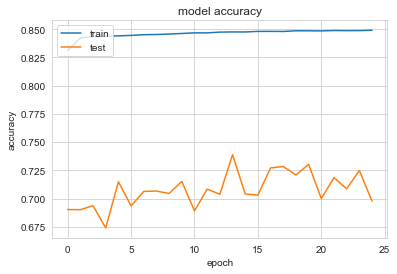

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

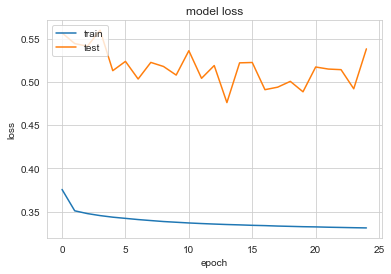

In [82]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Imblearn Under Sampling

In [83]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.datasets import make_classification

In [84]:
y.shape

(414532,)

In [85]:
X,y = make_classification(n_samples=414537,weights=[0.97], flip_y=0)

In [86]:
print(Counter(y))

Counter({0: 402101, 1: 12436})


In [87]:
undersample = RandomUnderSampler(sampling_strategy='majority')

In [88]:
X_over, y_over = undersample.fit_resample(X,y)

In [89]:
print(Counter(y_over))

Counter({0: 12436, 1: 12436})


Under Sample

In [90]:
count_class_0, count_class_1 = df_out.DELINQUENT.value_counts()

df_class_0 = df_out[df_out['DELINQUENT'] == 0]
df_class_1 = df_out[df_out['DELINQUENT'] == 1]

In [91]:
df_class_0.shape

(400633, 20)

In [92]:
df_class_1.shape

(13899, 20)

In [93]:
count_class_0, count_class_1

(400633, 13899)

In [94]:
400638/13899

28.82495143535506

In [95]:
400638/29

13815.103448275862

In [96]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0)
df_test_under.shape

(27798, 20)

In [97]:
print("Random under-sampling")
print(df_test_under.DELINQUENT.value_counts())

Random under-sampling
0    13899
1    13899
Name: DELINQUENT, dtype: int64


In [98]:
df_test_under.DELINQUENT = df_test_under.DELINQUENT.astype(np.int64)

In [99]:
X1 = df_test_under.drop('DELINQUENT', axis = 1)
y1 = df_test_under['DELINQUENT']

In [100]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=15, stratify=y1)

In [101]:
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((22238, 19), (5560, 19), (22238,), (5560,))

XG Boost on Undersample Data

In [102]:
import xgboost as xgb
from xgboost import XGBClassifier
data_dmatrix = xgb.DMatrix(data=X,label=y)

xgb_model = XGBClassifier()

In [103]:
xgb_model.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [104]:
y_pred_xg = xgb_model.predict(X_test1)

In [105]:
y_pred_xg1 = xgb_model.predict(X_test_s)

In [106]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred_xg, y_test1))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      2964
           1       0.80      0.86      0.83      2596

    accuracy                           0.83      5560
   macro avg       0.83      0.83      0.83      5560
weighted avg       0.83      0.83      0.83      5560



In [107]:
print(classification_report(y_pred_xg1, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.03      0.06    165813

    accuracy                           0.03    165813
   macro avg       0.50      0.02      0.03    165813
weighted avg       1.00      0.03      0.06    165813



In [108]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
          'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
            num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [109]:
xgb_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.614059,0.001218,0.611630,0.002783
1,0.836875,0.160375,0.835893,0.161838
2,0.961404,0.002520,0.959798,0.005557
3,0.961300,0.002689,0.959582,0.006453
4,0.963039,0.003322,0.961221,0.007639
5,0.962596,0.003834,0.960707,0.008113
6,0.961156,0.006929,0.959308,0.011386
7,0.964495,0.002682,0.962823,0.006937
8,0.966967,0.001721,0.966157,0.004939
9,0.968500,0.002074,0.967368,0.005917


Different Classifier try and Error

In [110]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [111]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

In [112]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_pred, y_test))

    return model.score(X_test, y_test)

In [113]:
scores_log = []
scores_svm = []
scores_rf = []
scores_nb = []
scores_desc = []
scores_knn = []

In [114]:
print("Logistic Regression Scores:\n", scores_log)
scores_log.append(get_score(LogisticRegression(class_weight='balanced'),X_resampled, X_test_s, y_resampled, y_test ))
print(scores_log)

Logistic Regression Scores:
 []
              precision    recall  f1-score   support

           0       0.88      0.99      0.93    142132
           1       0.76      0.18      0.29     23681

    accuracy                           0.87    165813
   macro avg       0.82      0.58      0.61    165813
weighted avg       0.86      0.87      0.84    165813

[0.8742076917973862]


In [115]:
print("Random Forest Scores:\n", scores_rf)
scores_rf.append(get_score(RandomForestClassifier(class_weight='balanced'),X_resampled, X_test_s, y_resampled, y_test ))
print(scores_rf)

Random Forest Scores:
 []
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    161958
           1       0.49      0.71      0.58      3855

    accuracy                           0.98    165813
   macro avg       0.74      0.84      0.78    165813
weighted avg       0.98      0.98      0.98    165813

[0.9763468485583157]


In [116]:
print("Naive Bayes Scores:\n", scores_nb)
scores_nb.append(get_score(GaussianNB(), X_resampled, X_test_s, y_resampled, y_test))
print(scores_nb)

Naive Bayes Scores:
 []
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    144933
           1       0.73      0.19      0.31     20880

    accuracy                           0.89    165813
   macro avg       0.81      0.59      0.62    165813
weighted avg       0.87      0.89      0.86    165813

[0.8893995042608239]


In [117]:
print("Decision Tree Scores:\n", scores_nb)
scores_desc.append(get_score(DecisionTreeClassifier(class_weight='balanced'),X_resampled, X_test_s, y_resampled, y_test))
print(scores_desc)

Decision Tree Scores:
 [0.8893995042608239]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    160192
           1       0.41      0.40      0.41      5621

    accuracy                           0.96    165813
   macro avg       0.70      0.69      0.69    165813
weighted avg       0.96      0.96      0.96    165813

[0.9602564334521418]


In [118]:
print("Knn  Scores:\n", scores_nb)
scores_knn.append(get_score(KNeighborsClassifier(), X_resampled, X_test_s, y_resampled, y_test))
print(scores_knn)

Knn  Scores:
 [0.8893995042608239]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    154562
           1       0.58      0.29      0.38     11251

    accuracy                           0.94    165813
   macro avg       0.77      0.64      0.68    165813
weighted avg       0.93      0.94      0.93    165813

[0.937761212932641]


Random Forest Grid Search

In [122]:
rfc=RandomForestClassifier(random_state=42)

In [123]:
param_grid = {
    'n_estimators':[200,500],
    'max_features':['auto', 'sqrt', 'log2'],
    'max_depth':[4,5,6,7,8],
    'criterion':['gini', 'entropy']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_resampled, y_resampled)

In [ ]:
CV_rfc.best_params_

In [ ]:
rfc1 = RandomForestClassifier(random_state=42, max_features='auto', n_estimators=200, max_depth=8, criterion='gini')

In [ ]:
rfc1.fit(X_resampled, y_resampled)

In [ ]:
y_pred_grid_rf=rfc1.predict(X_test_s)

In [ ]:
print(classification_report(y_pred_grid_rf, y_test))